<a href="https://www.kaggle.com/code/eminecansuakgul/clustering?scriptVersionId=150257860" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Clustering**

En temelde Clustering algoritması verilen data noktaları arasında ilişki ve benzerlik yakalamayı amaçlar. Unsupervised Learning problemlerinden biridir.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/merge3cluster.jpg" alt="Clustering" width="600" height="600">


## Clustering vs Classification

<table>
  <tr>
    <td>Supervised vs Unsupervised</td>
    <td>Clustering vs Classification</td>
  </tr>
  <tr>
    <td>
      <img src="https://www.sharpsightlabs.com/wp-content/uploads/2021/04/supervised-vs-unsupervised-learning_FEATURED-IMAGE.png" alt="Supervised vs Unsupervised" width="600" height="600">
    </td>
    <td>
      <img src="https://techdifferences.com/wp-content/uploads/2018/01/Untitled.jpg" alt="Clustering vs Classification" width="600" height="600">
    </td>
  </tr>
</table>



| Parametre     | Classification                      | Clustering                        |
| ------------- | ----------------------------------| ---------------------------------|
| Type           | Supervised learning| Unsupervised learning |
| Basic Process   | Giriş örneklerini sınıf etiketlerine dayalı olarak sınıflandırma | Giriş örneklerini sınıf etiketlerinin yardımı olmadan benzerliklerine göre gruplama |
| Need | Eğitim ve test veri kümesine ihtiyaç duyar çünkü etiketlere sahiptir | Eğitim ve test veri kümesine ihtiyaç duymaz |
| Complexity   | Clustering ile karşılaştırıldığında daha karmaşıktır | Classification daha az karmaşıktır |
| Example Algorithms | Logistic regression, Naive Bayes classifier, Support vector machines, etc. | k-means clustering algorithm, Fuzzy c-means clustering algorithm, Gaussian (EM) clustering algorithm, etc.|


## Kullanım alanları 
* Genetik Veri Analizi: Biyoinformatik alanında, genetik verilerin analizi için kümeleme kullanılır. Örneğin, belirli gen varyantlarını taşıyan bireyleri tanımlamak için kullanılabilir.
* Sosyal Ağ Analizi: Sosyal medya platformları ve diğer online topluluklarda, kullanıcıları benzer ilgi alanlarına veya etkinliklere sahip gruplara ayırmak için  kullanılabilir. 
* Müşteri Segmentasyonu: Alışveriş alışkanlıklarına, harcama alışkanlıklarına ve demografik özelliklere göre müşterileri gruplandırarak, ürün önerileri ve pazarlama stratejileri oluşturmak için kullanılır.
* Anomali Tespiti: Siber güvenlik alanında saldırıları tespit etmek için kullanılabilir.

### K-Means Clustering Algorithm
* En yaygın kullanılan türüdür.
* K cluster sayısı

1. Verilen datalar için random cluster centroidler seç
2. Her bir data noktası için en yakın centroidi bul.
2. İlk iterasyon sonrasında clusterlardaki noktaların ortalamasını al ve merkezleri o ortalamaya taşı.
3. Clusterlar değişmemeye başlayana kadar(converge olana kadar) ya da belirlenen iterasyon sayısı kadar(örneğin 100) tekrarla.

![clustering algorithm](https://miro.medium.com/v2/resize:fit:1280/1*rwYaxuY-jeiVXH0fyqC_oA.gif)

### Implementing K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
# Generate random data for clustering using make_blobs
X, _ = make_blobs(n_samples=100, centers=5,cluster_std=2.0, random_state=42)

# Create a DataFrame for better data management
data = pd.DataFrame(X, columns=['X1', 'X2'])

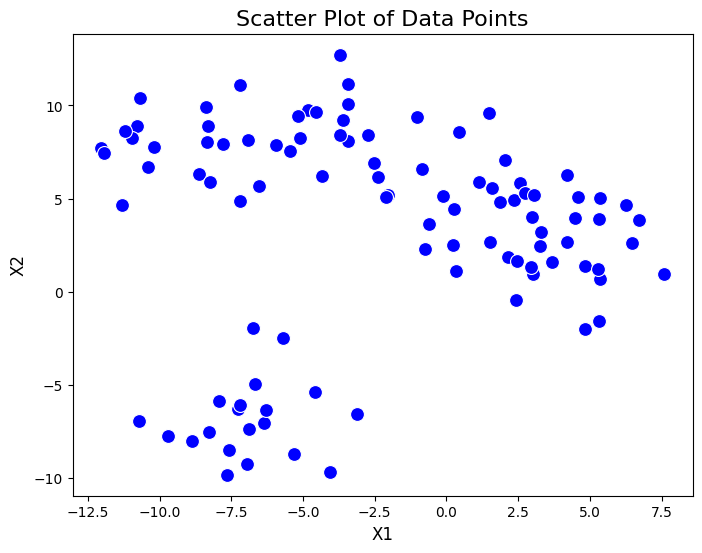

In [3]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X1', y='X2', data=data, s=100, color='b')
plt.title('Scatter Plot of Data Points', fontsize=16)
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.show()

In [4]:
# Create a K-Means clustering model with 5 clusters
Kmeans = KMeans(n_clusters=5, n_init='auto')
Kmeans.fit(data)

KMeans(n_clusters=5, n_init='auto')

In [5]:
# Display cluster centers
print('Cluster Centers:')
print(Kmeans.cluster_centers_)

Cluster Centers:
[[ 4.53729504  2.05611976]
 [-9.32212128  7.75328041]
 [ 1.49522192  4.51143626]
 [-6.89501607 -6.81681824]
 [-3.11152155  8.37685604]]


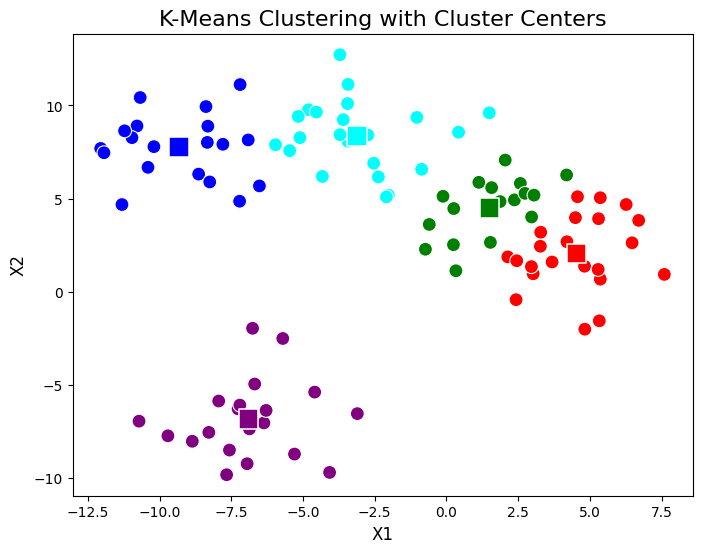

In [6]:
# Create a scatter plot with cluster centers using Seaborn, with different colors for each cluster
cluster_colors = ['red', 'blue', 'green', 'purple', 'cyan']
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X1', y='X2', data=data, s=100, hue=Kmeans.labels_, palette=cluster_colors, legend=False)
sns.scatterplot(x=Kmeans.cluster_centers_[:, 0], y=Kmeans.cluster_centers_[:, 1], s=200, color=cluster_colors, marker='s')
plt.title('K-Means Clustering with Cluster Centers', fontsize=16)
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.show()


In [7]:
# Get the cluster labels for each data point
print('Cluster Labels:')
print(Kmeans.labels_)

Cluster Labels:
[3 2 4 2 1 3 0 0 0 4 4 3 2 4 0 1 2 2 3 4 1 0 4 3 1 1 0 2 2 0 3 1 2 2 2 1 4
 4 4 0 3 0 0 0 1 4 4 3 1 2 2 0 0 3 0 1 2 0 4 4 0 4 1 3 1 3 2 2 3 4 1 3 3 3
 0 1 0 1 2 3 2 3 1 0 1 4 1 4 4 4 1 4 3 0 3 4 3 4 0 0]


## Bonus ✨ Color Quantization using K-Means

In [8]:
from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image

In [9]:
# You can adjust the number of color whatever you like. HINT: if you reduce n_color, you can
# easily observe the color clusters.
n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

In [10]:
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


In [11]:
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(
    image_array_sample
)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

Fitting model on a small sub-sample of the data
done in 0.021s.
Predicting color indices on the full image (k-means)
done in 0.014s.


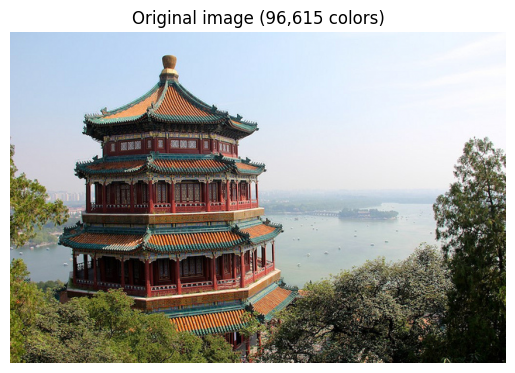

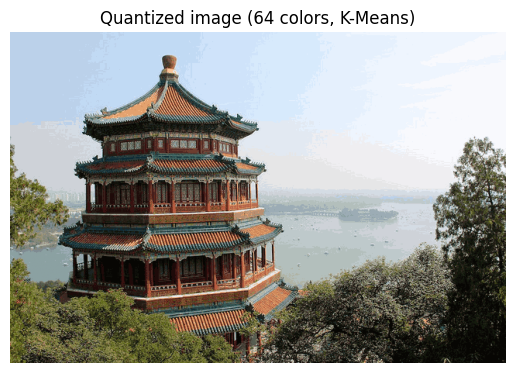

In [12]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

## References
* https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
* https://www.coursera.org/learn/unsupervised-learning-recommenders-reinforcement-learning/programming/hxhn9/k-means
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html